In [39]:
pip install pytorch-msssim

  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.3
    Uninstalling sympy-1.13.3:
      Successfully uninstalled sympy-1.13.3
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   -------- ------------------------------- 8.7/39.5 MB 48.8 MB/s eta 0:00:01
   ------------------ --------------------- 18.6/39.5 MB 46.9 MB/s eta 0:00:01
   ---------------------------- ----------- 28.6/39.5 MB 46.4 MB/s eta 0:00:01
   ---------------------------------------  39.1/39.5 MB 47.7 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 41.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib
pip install gdown

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------------ --------------------------- 2.4/7.8 MB 13.4 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 21.3 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 19.3 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 24.9 MB/s eta 0:00:00
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
#library used to install dataset 
pip install gdown

  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
Using cached soupsieve-2.6-py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import torchvision.transforms as transforms
from torchvision.datasets import CelebA
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [7]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64
    transforms.ToTensor(),        # Convert to tensor
])

# Download CelebA dataset 
celeba_dataset = CelebA(root="./data", split="train", transform=transform, download=True)
dataloader = DataLoader(celeba_dataset, batch_size=32, shuffle=True)


Downloading...
From (original): https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM
From (redirected): https://drive.usercontent.google.com/download?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM&confirm=t&uuid=47ec8fe9-9038-41c4-8b72-52ae4b97d3c4
To: C:\Users\adria\OneDrive\Desktop\ece176\final project\data\celeba\img_align_celeba.zip
100%|█████████████████████████████████████████████████████████████████████████████| 1.44G/1.44G [00:22<00:00, 63.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pblRyaVFSWGxPY0U
To: C:\Users\adria\OneDrive\Desktop\ece176\final project\data\celeba\list_attr_celeba.txt
100%|█████████████████████████████████████████████████████████████████████████████| 26.7M/26.7M [00:00<00:00, 47.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_ee_0u7vcNLOfNLegJRHmolfH5ICW-XS
To: C:\Users\adria\OneDrive\Desktop\ece176\final project\data\celeba\identity_CelebA.txt
100%|█████████████████████████████████████████████████████████████████████████████|

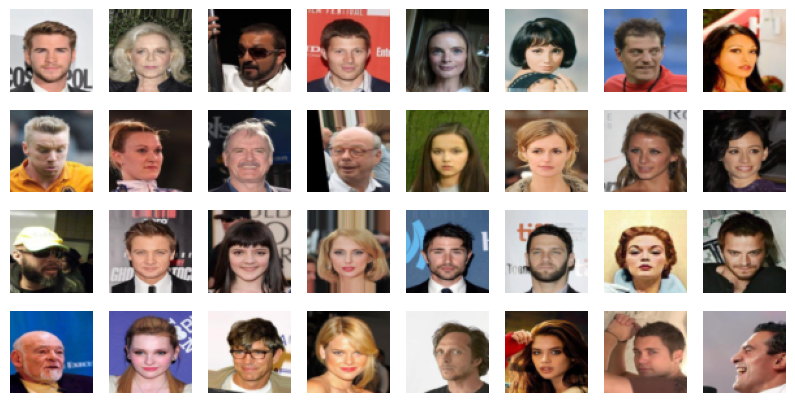

In [8]:
# Get a batch of images
data_iter = iter(dataloader)
images, _ = next(data_iter)

fig, axes = plt.subplots(4, 8, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    img = images[i].permute(1, 2, 0)  # Convert shape to (H, W, C)
    ax.imshow(img)
    ax.axis("off")

plt.show()


Creating the masks 3.2 

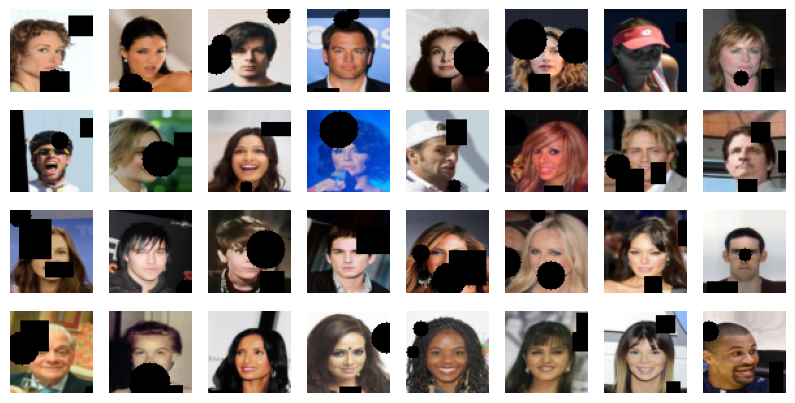

In [33]:
import torch
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_random_mask(image):
    """Apply a random shape mask to an image"""
    img_size = image.shape[1]
    mask = torch.ones_like(image)

    num_shapes = random.randint(1, 3)  # Use 1-3 random shapes
    for _ in range(num_shapes):
        x, y = random.randint(0, img_size - 1), random.randint(0, img_size - 1)
        w, h = random.randint(img_size // 6, img_size // 2), random.randint(img_size // 6, img_size // 2)

        # Convert mask to NumPy (single-channel format)
        mask_numpy = mask.cpu().numpy()
        
        # Convert multi-channel mask to single-channel (grayscale) for OpenCV
        mask_numpy = np.mean(mask_numpy, axis=0)  # Take mean across color channels

        # Apply rectangle or circle
        if random.random() > 0.5:
            mask_numpy[x:x+w, y:y+h] = 0  # Rectangle
        else:
            cv2.circle(mask_numpy, (x, y), w // 2, 0, -1)  # Circle (single-channel)

        
        mask_numpy = np.expand_dims(mask_numpy, axis=0) 
        mask = torch.tensor(mask_numpy, dtype=torch.float32, device=image.device).repeat(3, 1, 1)  # Expand to 3 channels

    return image * mask  # Apply mask to image


# Test improved mask generation
masked_images = [apply_random_mask(img) for img in real_images]

#printing the images 
# Get a batch of real images
data_iter = iter(dataloader)
real_images, _ = next(data_iter)
real_images = real_images.to(device)

# Apply random masks
masked_images = [apply_random_mask(img) for img in real_images]

masked_images = torch.stack(masked_images)

# Visualize masked images
fig, axes = plt.subplots(4, 8, figsize=(10, 5))  # Adjust grid size based on batch size
for i, ax in enumerate(axes.flat):
    img = masked_images[i].cpu().permute(1, 2, 0).numpy()  # Convert tensor to NumPy
    ax.imshow(img)
    ax.axis("off")

plt.show()



In [43]:
import torch.nn as nn

class UNetGenerator(nn.Module):
    def __init__(self, in_channels=3, out_channels=3):
        super(UNetGenerator, self).__init__()

        # Encoder
        self.enc1 = nn.Sequential(nn.Conv2d(in_channels, 64, 4, stride=2, padding=1), nn.ReLU(inplace=True))
        self.enc2 = nn.Sequential(nn.Conv2d(64, 128, 4, stride=2, padding=1), nn.BatchNorm2d(128), nn.ReLU(inplace=True))
        self.enc3 = nn.Sequential(nn.Conv2d(128, 256, 4, stride=2, padding=1), nn.BatchNorm2d(256), nn.ReLU(inplace=True))

        # Bottleneck
        self.bottleneck = nn.Sequential(nn.Conv2d(256, 512, 4, stride=2, padding=1), nn.ReLU(inplace=True))

        # Decoder with Skip Connections
        self.dec3 = nn.Sequential(nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1), nn.BatchNorm2d(256), nn.ReLU(inplace=True))
        self.dec2 = nn.Sequential(nn.ConvTranspose2d(256 + 256, 128, 4, stride=2, padding=1), nn.BatchNorm2d(128), nn.ReLU(inplace=True))
        self.dec1 = nn.Sequential(nn.ConvTranspose2d(128 + 128, 64, 4, stride=2, padding=1), nn.BatchNorm2d(64), nn.ReLU(inplace=True))

        self.final_layer = nn.Sequential(nn.ConvTranspose2d(64 + 64, out_channels, 4, stride=2, padding=1), nn.Tanh())

    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)
        e2 = self.enc2(e1)
        e3 = self.enc3(e2)

        # Bottleneck
        b = self.bottleneck(e3)

        # Decoder with Skip Connections
        d3 = self.dec3(b)
        d2 = self.dec2(torch.cat([d3, e3], dim=1))  # Skip connection from e3
        d1 = self.dec1(torch.cat([d2, e2], dim=1))  # Skip connection from e2
        out = self.final_layer(torch.cat([d1, e1], dim=1))  # Skip connection from e1

        return out

generator = UNetGenerator().to(device)

print(generator)


UNetGenerator(
  (enc1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (enc3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (bottleneck): Sequential(
    (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (dec3): Sequential(
    (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (dec2): Sequential(
    (0): ConvTranspose2d(51

In [47]:
class PatchGANDiscriminator(nn.Module):
    def __init__(self, in_channels=3):
        super(PatchGANDiscriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 1, kernel_size=4, stride=1, padding=1)  
        )

    def forward(self, x):
        return self.model(x)

discriminator = PatchGANDiscriminator().to(device)

print(discriminator)




PatchGANDiscriminator(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 1, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  )
)


Loss functions

In [18]:
adversarial_loss = nn.BCELoss()  # Binary Cross Entropy for GAN
reconstruction_loss = nn.L1Loss()  # L1 loss to compare inpainted vs. ground truth


VGG model and perceptual loss 

In [36]:
import torchvision.models as models

class VGGPerceptualLoss(nn.Module):
    def __init__(self):
        super(VGGPerceptualLoss, self).__init__()
        vgg = models.vgg16(pretrained=True).features[:16]  # Use first few layers
        for param in vgg.parameters():
            param.requires_grad = False  # Freeze weights
        self.vgg = vgg.to(device)

    def forward(self, fake, real):
        fake_features = self.vgg(fake)
        real_features = self.vgg(real)
        loss = torch.nn.functional.mse_loss(fake_features, real_features)  # Compare feature maps
        return loss

perceptual_loss = VGGPerceptualLoss()


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\adria/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100.0%


Training the discriminators and generators

In [19]:
import torch.optim as optim

lr = 0.0002  # Learning rate
#using the adam optimizer 
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))


In [37]:
def compute_generator_loss(fake_images, real_images, fake_preds):
    adv_loss = adversarial_loss(fake_preds, torch.ones_like(fake_preds))  # Fool Discriminator
    recon_loss = reconstruction_loss(fake_images, real_images)  # Pixel-level accuracy
    perc_loss = perceptual_loss(fake_images, real_images)  # Feature-level accuracy

    total_loss = adv_loss + 0.1 * recon_loss + 0.01 * perc_loss  # Weighted sum
    return total_loss


In [41]:
import torch.nn.functional as F

def psnr(real, fake):
    """Compute Peak Signal-to-Noise Ratio (PSNR) between real and generated images."""
    mse = F.mse_loss(fake, real)  # Compute Mean Squared Error (MSE)
    psnr_value = 20 * torch.log10(1.0 / torch.sqrt(mse))  # Convert to PSNR
    return psnr_value


In [46]:
import torch
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
from pytorch_msssim import ssim
import torchvision.transforms as transforms

# Training parameters
num_epochs = 10
lr = 0.0002  # Learning rate
beta = 0.999  # EMA smoothing factor

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move models to the appropriate device
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Create an Exponential Moving Average (EMA) generator for smoother training
generator_ema = Generator().to(device)
for param in generator_ema.parameters():
    param.requires_grad = False  # EMA model should not update directly

# Define optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Training loop
for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(dataloader):
        real_images = real_images.to(device)

        # Apply random masks
        masked_images = torch.stack([apply_random_mask(img) for img in real_images]).to(device)

        # Generate inpainted images
        fake_images = generator(masked_images)

        # ----- Train Discriminator -----
        optimizer_D.zero_grad()
        real_preds = discriminator(real_images)
        fake_preds = discriminator(fake_images.detach())  # Detach to prevent updating G

        # Label smoothing: Prevent D from overpowering G
        loss_real = adversarial_loss(real_preds, torch.full_like(real_preds, 0.9))  # Real label = 0.9
        loss_fake = adversarial_loss(fake_preds, torch.full_like(fake_preds, 0.1))  # Fake label = 0.1
        loss_D = (loss_real + loss_fake) / 2

        loss_D.backward()
        optimizer_D.step()

        # ----- Train Generator -----
        optimizer_G.zero_grad()
        fake_preds = discriminator(fake_images)  # Evaluate fake images

        loss_G = compute_generator_loss(fake_images, real_images, fake_preds)  # Uses perceptual loss
        loss_G.backward()
        optimizer_G.step()

        # ----- Update Generator EMA -----
        with torch.no_grad():
            for p, ema_p in zip(generator.parameters(), generator_ema.parameters()):
                ema_p.data = beta * ema_p.data + (1 - beta) * p.data

        # Print progress every 100 batches
        if i % 100 == 0:
            psnr_value = psnr(real_images, fake_images).item()
            ssim_value = ssim(real_images, fake_images, data_range=1.0).item()

            print(f"Epoch [{epoch+1}/{num_epochs}] Batch {i}/{len(dataloader)} | "
                  f"D Loss: {loss_D.item():.4f} | G Loss: {loss_G.item():.4f} | "
                  f"PSNR: {psnr_value:.2f} | SSIM: {ssim_value:.4f}")

# Save model checkpoints
torch.save(generator.state_dict(), "generator.pth")
torch.save(discriminator.state_dict(), "discriminator.pth")
torch.save(generator_ema.state_dict(), "generator_ema.pth")

print("Training complete. Models saved!")



Epoch [1/10] Batch 0/5087 | D Loss: 0.7175 | G Loss: 0.9084 | PSNR: 5.52 | SSIM: -0.0895
Epoch [1/10] Batch 100/5087 | D Loss: 0.5014 | G Loss: 1.7391 | PSNR: 3.09 | SSIM: 0.0044


KeyboardInterrupt: 